In [3]:
import numpy as np 
import pandas as pd 
import os
from matplotlib import pyplot as plt
import random
from PIL import Image 


In [5]:
# We will open the wiki_labels.csv file and store it in variable picture_dataset_csv
given_picture_dataset_csv = pd.read_csv("wiki_labels.csv")

# This will show the first 10 rows of the data frame. This is to ensure that we are properly opening the file.
given_picture_dataset_csv.head(10)

,ID,dob,dob_str,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,age
0,2002,723671,['05-May-1981'],2009,['17/10000217_1981-05-05_2009.png'],1.0,['Sami Jauhojärvi'],[[111.29109473 111.29109473 252.66993082 252.6...,4.300962388,NaN,27.746119
1,2003,711677,['03-Jul-1948'],2008,['12/100012_1948-07-03_2008.png'],1.0,['Marc Okrand'],[[113.52 169.84 366.08 422.4 ]],4.329328832,NaN,59.582192
2,2004,705061,['23-May-1930'],1961,['65/10001965_1930-05-23_1961.png'],1.0,['Aleksandar Matanović'],[[ 1 1 634 440]],#NAME?,NaN,30.696804
3,2005,720044,['31-May-1971'],2012,['16/10002116_1971-05-31_2012.png'],0.0,['Diana Damrau'],[[171.61031405 75.5745124 266.76611571 170.7...,3.408442415,NaN,40.672146
4,2006,716189,['09-Nov-1960'],2012,['02/10002702_1960-11-09_2012.png'],0.0,['Krista Tippett'],[[274.7656324 57.77009008 376.88699455 159.8...,4.748056378,NaN,51.224201
5,2007,707745,['27-Sep-1937'],1971,['41/10003541_1937-09-27_1971.png'],1.0,['Bernie Whitebear'],[[ 79.35580189 26.65993396 197.60950472 144.9...,4.184828312,NaN,33.347032
6,2008,695763,['07-Dec-1904'],1982,['39/100039_1904-12-07_1982.png'],1.0,['Clarence Nash'],[[152.90731132 95.90456958 323.01553656 266.0...,3.006350125,1.10334,77.149087
7,2009,711000,['26-Aug-1946'],2007,['13/10004113_1946-08-26_2007.png'],1.0,['William W. Destler'],[[1 1 1 1]],#NAME?,NaN,60.435845
8,2010,723987,['17-Mar-1982'],2011,['22/10004122_1982-03-17_2011.png'],1.0,['Daniel Smith'],[[ 1 1 592 440]],#NAME?,NaN,28.877169
9,2011,697114,['19-Aug-1908'],1950,['99/10004299_1908-08-19_1950.png'],1.0,['Carl Greenberg'],[[107.58644628 107.58644628 298.77804959 298.7...,4.526657045,NaN,41.455023


In [6]:
# We will check if there are any null values in any row in the wiki_labels.csv file.
given_picture_dataset_csv.isnull().sum()
# After running this line, we can see that there is some null values for the gender and for the second_face_score

ID                       0
dob                      0
dob_str                  0
photo_taken              0
full_path                0
gender                2553
name                     0
face_location            0
face_score               0
second_face_score    56364
age                      0
dtype: int64

In [8]:
# This will print the entire dataset.csv file out. Since we see 60327 rows and 11 columns, we know all the data was read correctly
given_picture_dataset_csv

,ID,dob,dob_str,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,age
0,2002,723671,['05-May-1981'],2009,['17/10000217_1981-05-05_2009.png'],1.0,['Sami Jauhojärvi'],[[111.29109473 111.29109473 252.66993082 252.6...,4.300962388,NaN,27.746119
1,2003,711677,['03-Jul-1948'],2008,['12/100012_1948-07-03_2008.png'],1.0,['Marc Okrand'],[[113.52 169.84 366.08 422.4 ]],4.329328832,NaN,59.582192
2,2004,705061,['23-May-1930'],1961,['65/10001965_1930-05-23_1961.png'],1.0,['Aleksandar Matanović'],[[ 1 1 634 440]],#NAME?,NaN,30.696804
3,2005,720044,['31-May-1971'],2012,['16/10002116_1971-05-31_2012.png'],0.0,['Diana Damrau'],[[171.61031405 75.5745124 266.76611571 170.7...,3.408442415,NaN,40.672146
4,2006,716189,['09-Nov-1960'],2012,['02/10002702_1960-11-09_2012.png'],0.0,['Krista Tippett'],[[274.7656324 57.77009008 376.88699455 159.8...,4.748056378,NaN,51.224201
5,2007,707745,['27-Sep-1937'],1971,['41/10003541_1937-09-27_1971.png'],1.0,['Bernie Whitebear'],[[ 79.35580189 26.65993396 197.60950472 144.9...,4.184828312,NaN,33.347032
6,2008,695763,['07-Dec-1904'],1982,['39/100039_1904-12-07_1982.png'],1.0,['Clarence Nash'],[[152.90731132 95.90456958 323.01553656 266.0...,3.006350125,1.10334,77.149087
7,2009,711000,['26-Aug-1946'],2007,['13/10004113_1946-08-26_2007.png'],1.0,['William W. Destler'],[[1 1 1 1]],#NAME?,NaN,60.435845
8,2010,723987,['17-Mar-1982'],2011,['22/10004122_1982-03-17_2011.png'],1.0,['Daniel Smith'],[[ 1 1 592 440]],#NAME?,NaN,28.877169
9,2011,697114,['19-Aug-1908'],1950,['99/10004299_1908-08-19_1950.png'],1.0,['Carl Greenberg'],[[107.58644628 107.58644628 298.77804959 298.7...,4.526657045,NaN,41.455023


In [13]:
# Gets the full path of all pictures and stores it under variable get_picture_path
get_picture_path = given_picture_dataset_csv['full_path']
get_picture_path

0        ['17/10000217_1981-05-05_2009.png']
1          ['12/100012_1948-07-03_2008.png']
2        ['65/10001965_1930-05-23_1961.png']
3        ['16/10002116_1971-05-31_2012.png']
4        ['02/10002702_1960-11-09_2012.png']
5        ['41/10003541_1937-09-27_1971.png']
6          ['39/100039_1904-12-07_1982.png']
7        ['13/10004113_1946-08-26_2007.png']
8        ['22/10004122_1982-03-17_2011.png']
9        ['99/10004299_1908-08-19_1950.png']
10        ['56/1000456_1933-06-12_1969.png']
11       ['82/10004882_1987-05-16_2010.png']
12        ['22/1000522_1931-01-15_1959.png']
13       ['61/10005261_1936-06-24_1974.png']
14       ['47/10005947_1981-04-07_2006.png']
15        ['84/1000684_1972-04-05_2004.png']
16       ['50/10006850_1973-08-17_2010.png']
17       ['77/10007577_1988-06-16_2007.png']
18        ['81/1000781_1930-07-07_2008.png']
19         ['87/100087_1889-05-19_1940.png']
20         ['97/100097_1968-03-23_2010.png']
21        ['91/1001191_1980-11-08_2011.png']
22        

In [17]:
# Gets the full path of all pictures and stores it under variable get_picture_path
get_picture_path = given_picture_dataset_csv['full_path']
get_picture_path = get_picture_path.map(lambda x: x.lstrip("['").rstrip("']"))
get_picture_path

0        17/10000217_1981-05-05_2009.png
1          12/100012_1948-07-03_2008.png
2        65/10001965_1930-05-23_1961.png
3        16/10002116_1971-05-31_2012.png
4        02/10002702_1960-11-09_2012.png
5        41/10003541_1937-09-27_1971.png
6          39/100039_1904-12-07_1982.png
7        13/10004113_1946-08-26_2007.png
8        22/10004122_1982-03-17_2011.png
9        99/10004299_1908-08-19_1950.png
10        56/1000456_1933-06-12_1969.png
11       82/10004882_1987-05-16_2010.png
12        22/1000522_1931-01-15_1959.png
13       61/10005261_1936-06-24_1974.png
14       47/10005947_1981-04-07_2006.png
15        84/1000684_1972-04-05_2004.png
16       50/10006850_1973-08-17_2010.png
17       77/10007577_1988-06-16_2007.png
18        81/1000781_1930-07-07_2008.png
19         87/100087_1889-05-19_1940.png
20         97/100097_1968-03-23_2010.png
21        91/1001191_1980-11-08_2011.png
22        31/1001231_1981-01-30_2014.png
23       32/10012532_1983-03-30_2011.png
24        85/100

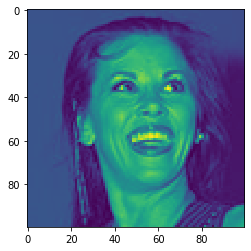

In [23]:
# Testing a random full_path to ensure the path is working. It is working when a picture is displayed.
image = Image.open("wiki_labeled/wiki_labeled/" + get_picture_path[29348])
plt.imshow(image) # This shows the image without opening a new tab to view it in.
plt.show() # This removes the image message that appears at the tops of the image. This is included to make it look visually appealing.

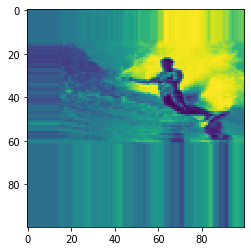

In [24]:
# Testing a second random full_path to ensure the path is working. It is working when a picture is displayed.
image = Image.open("wiki_labeled/wiki_labeled/" + get_picture_path[47391])
plt.imshow(image) # This shows the image without opening a new tab to view it in.
plt.show() # This removes the image message that appears at the tops of the image. This is included to make it look visually appealing.